In [1]:
using StatsPlots, UnROOT, StatsBase, CategoricalArrays
using FHist, LaTeXStrings, MPThemes, DataFrames, DataFramesMeta, Distributions

Custom functions are placed in the MiscFuncs.jl file.

In [2]:
include("MiscFuncs.jl")
using .MiscFuncs

In [18]:
gr()
my_vibrant(;
    size           = (800, 600),
    legend         = :outertopleft,
    guidefontsize  = 8,
    tickfontsize   = 8,
    titlefontsize  = 8,
    legendfontsize = 6,
    left_margin    = 4Plots.mm,
    right_margin   = 4Plots.mm,
    top_margin     = 4Plots.mm,
    bottom_margin  = 4Plots.mm,
    dpi            = 200,
);

In [4]:
baseDir = "/home/shoram/Work/PhD_Thesis/Job15/AngularCorrelations/"

"/home/shoram/Work/PhD_Thesis/Job15/AngularCorrelations/"

In [5]:
f = ROOTFile(
    baseDir*"AngularCorrelationAllEnergies96MilEvents.root",
);
tree = DataFrame(LazyTree(f, "tree", keys(f["tree"])));

### ``@transform`` adds a column ``:ESum`` to the ``tree`` which contains the sum of the electron energies

In [6]:
@transform! tree :ESum = :reconstructedEnergy2 + :reconstructedEnergy1;

### Initializing constants.

In [15]:

dEmitted = 1 # dθdif in degrees
nBins    = Int(180 / dEmitted)
minAngle = 0
maxAngle = 180
binWidth = maxAngle / nBins

minEnergy = 500
maxEnergy = 3500
dEnergy   = 500

xPts = minAngle:dEmitted:maxAngle

0:1:180

In [8]:
colors = [palette(:seaborn_bright)[i] for i in 1:length(palette(:seaborn_bright))];

### The 2d Histogram of ``ϕ`` vs ``θ`` is defined to be ``f(ϕ, θ)``. For each combination of ``ϕ`` and ``θ``, the bin number is obtained as functional value of ``f(ϕ, θ)``.

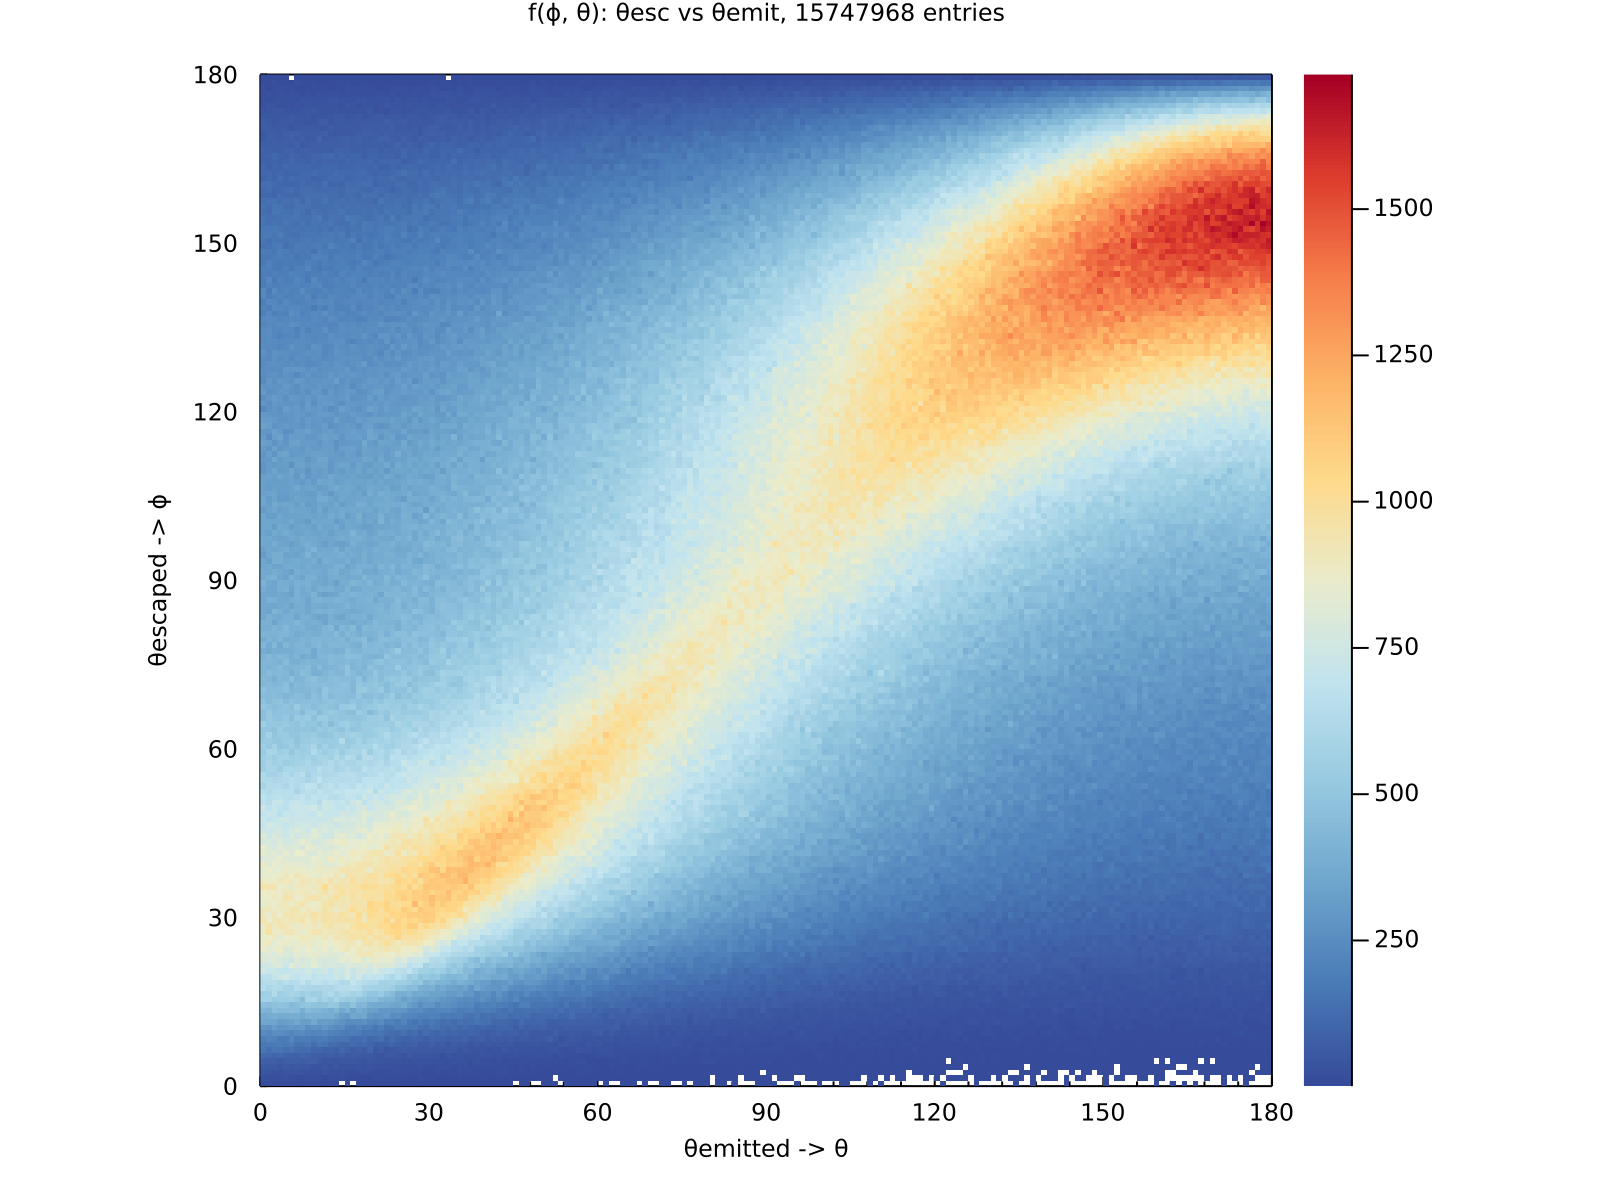

In [24]:
fh2d = Hist2D(                                           # h2d object similar to TH2D from ROOT
(tree.thetaEmitted, tree.thetaEscaped),      
(minAngle:dEmitted:maxAngle, minAngle:dEmitted:maxAngle), 
) 

h2d = histogram2d(
    tree.thetaEmitted,
    tree.thetaEscaped;
    nbins        = (nBins, nBins),
    xlabel       = "θemitted -> θ",
    ylabel       = "θescaped -> ϕ",
    legend       = :topright,
    title        = string("f(ϕ, θ): θesc vs θemit, ", nrow(tree), " entries"),
    lims         = (0, 180),
    aspect_ratio = 1,
)


In [20]:
savefig(h2d, joinpath(baseDir, string("h2d.png")))

### We define a line: ``ϕ - θ - k = 0`` with factor ``k`` which representing a diagonal line of ``f(ϕ, θ)``. Where:
1. ``k = 0`` represents the line ``ϕ = θ``. In other words, the escaped angle is same as emitted.
2. ``k < 0`` represents the lines where ``ϕ < θ``. Escaped underestimates emitted.
3. ``k > 0`` represents the lines where ``ϕ > θ``. Escaped underestimates emitted.


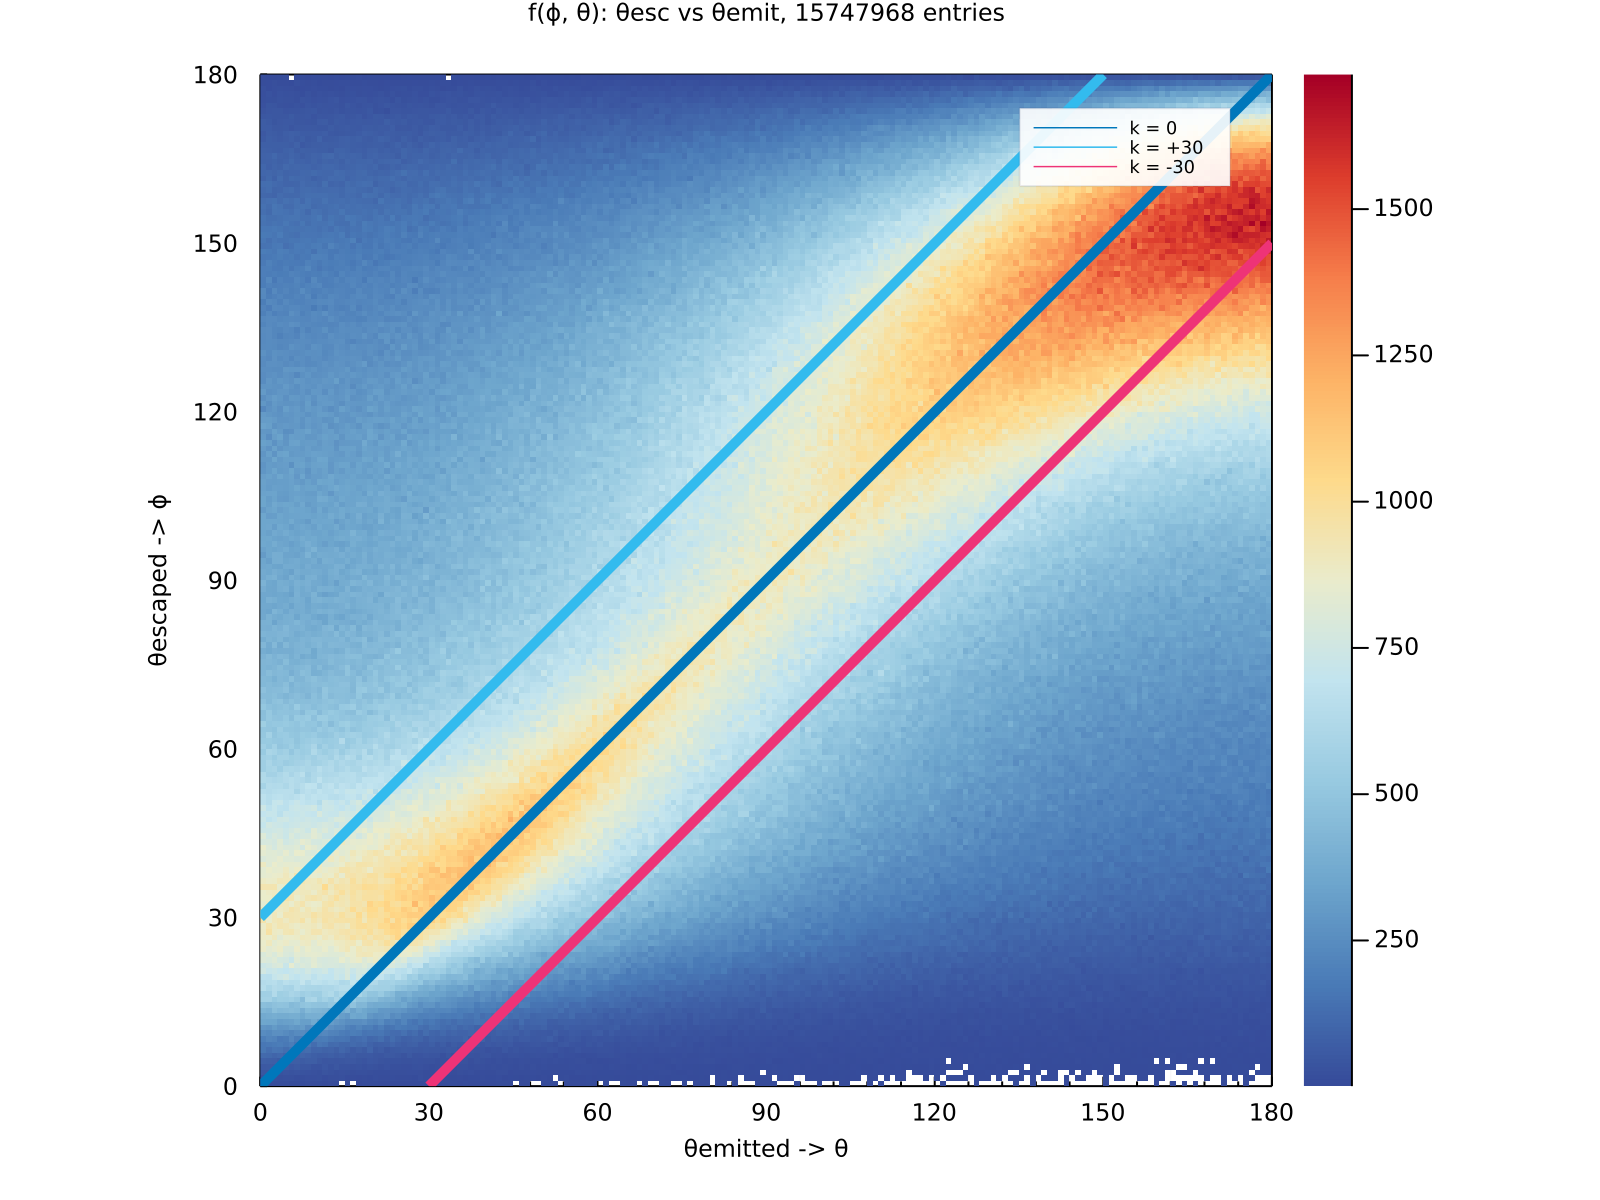

In [23]:
plot!(xPts, y.(xPts), label = "k = 0", lw = 5)
plot!(xPts, y.(xPts) .+ 30, label = "k = +30", lw = 5)
plot!(xPts, y.(xPts) .- 30, label = "k = -30", lw = 5)

### Next we define function ``g(k)`` representing the integral over the diagonal bins of the lines ``k``

In [29]:
gs = get_diagonal_sums(fh2d)
ks = get_k_factors(fh2d);

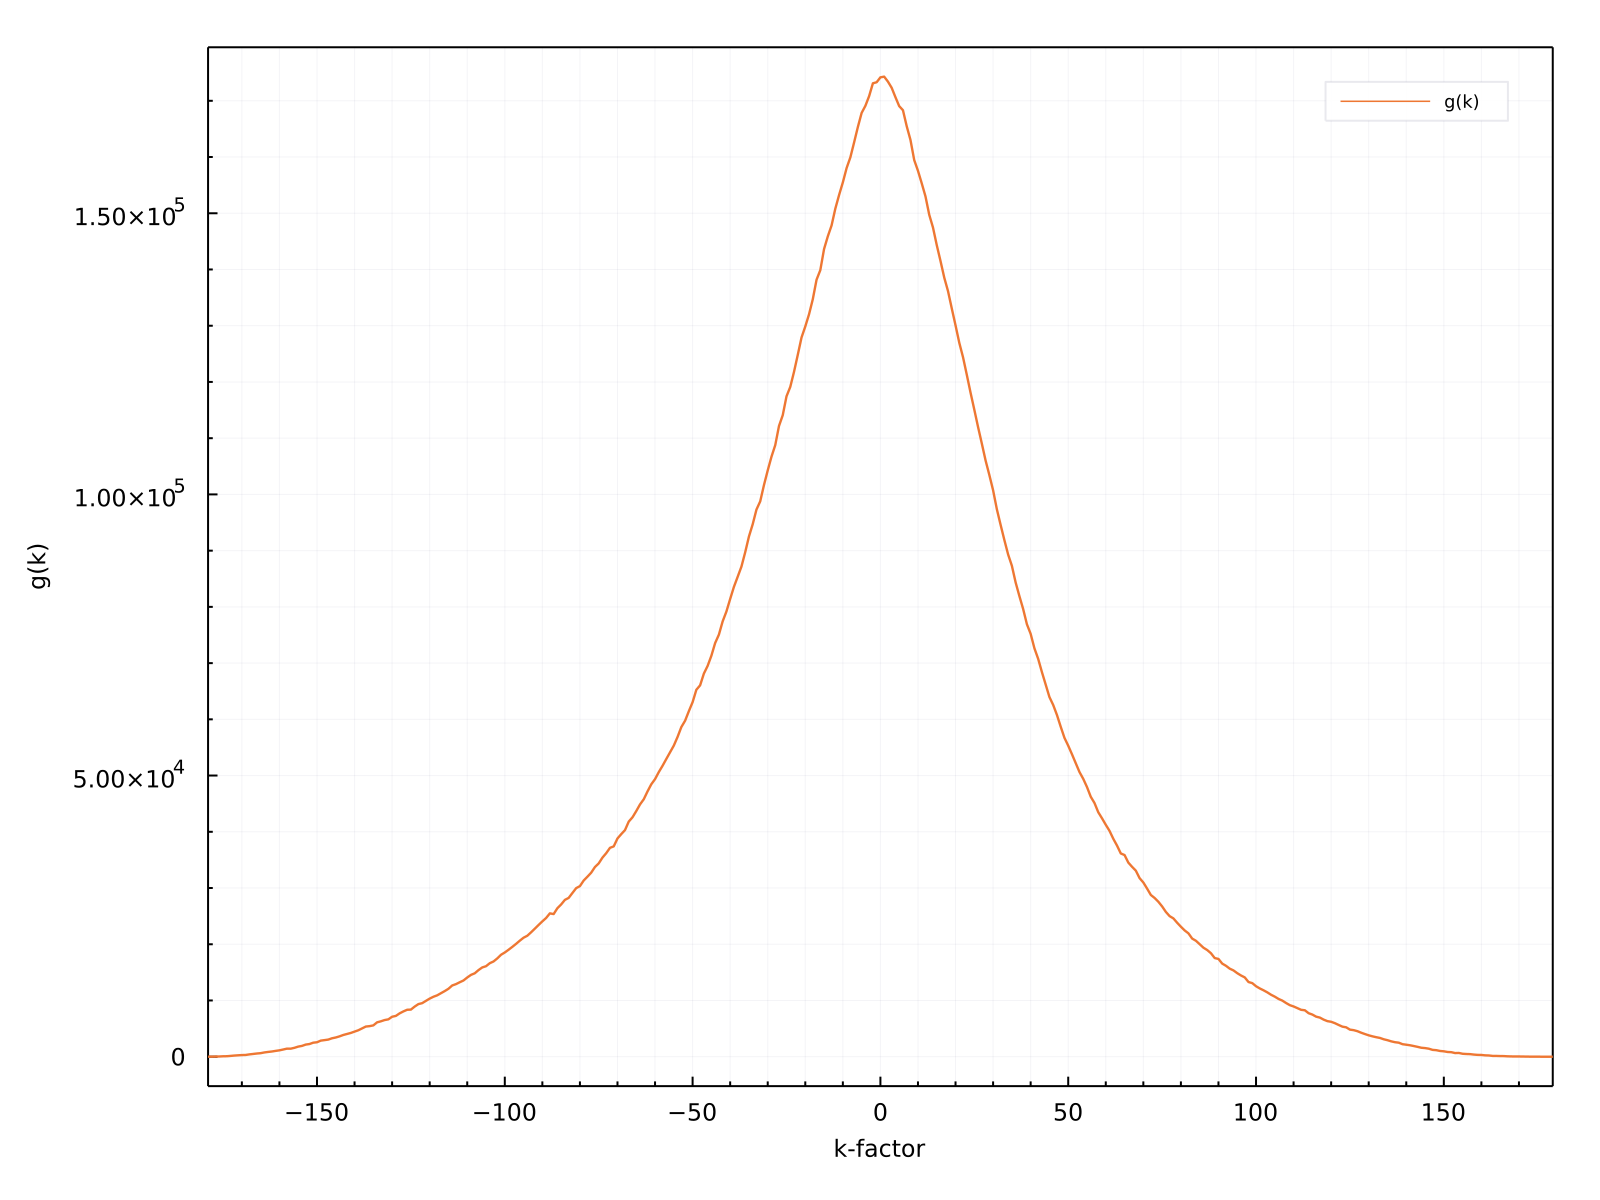

In [36]:
plot(ks, gs, legend=:topright, xlims=(-179, 179), xlabel="k-factor", ylabel="g(k)", label="g(k)")

In [ ]:
dθ = 10
sign = "p"
maxSteps = Int(180 / dθ)